In [30]:

import matplotlib.pyplot as plt
import random 
from   itertools import product
from   collections import Counter

## Problem 1: Generalized dice
### 1.Modify your computer program to simulate the roll of N dice. Your program should let the dice have any number of sides, but the same number of sides for each die. The number of dice and the number of sides should be read in at the start of the program. One trial will consist of N rolls. Your program should calculate the sum of the N numbers that occur during each trial. It should also compare the results for the mean, variance, and standard deviation of that sum with the theoretical predictions.

sides    numbers
 4             3
 6             3
------------------------------------
sum        count
  6            10
  7            38
  8           150
  9           409
 10           870
 11          1667
 12          2892
 13          4395
 14          6135
 15          7914
 16          9333
 17         10527
 18         10939
 19         10519
 20          9591
 21          7900
 22          6195
 23          4493
 24          2877
 25          1679
 26           851
 27           436
 28           133
 29            38
 30             9
average:      18.0110    
variance:     12.4899    
deviation:    3.5341     


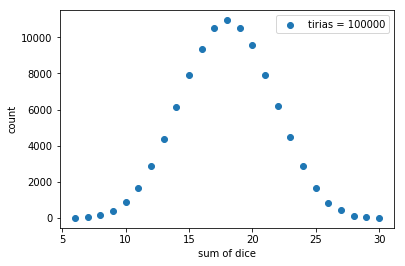

In [31]:
def dice(s):
    """ given how many sides, return one trial of throwing a dice of s sides"""
    return random.randint(1,s)

def one_trial(*pairs): #(sides,numbers)
    """given the sides and numbers of dices,return the result of one trial"""
    result = []
    for pair in pairs:
        sides,numbers = pair
        result += [dice(sides) for _ in range(numbers)]
    return result

def sum_dices(*pairs,N=100):
    """given N trials, return the sum of the dices"""
    count = Counter([sum(one_trial(*pairs)) for _ in range(N)])
    return count

def display(*pairs,trials=100,show_detail=False):
    print("sides"+" "*4+"numbers")
    for pair in pairs:
        print("{:2}{:>14}".format(pair[0],pair[1]))
    result = sum_dices(*pairs,N=trials)
    order  = sorted(result.keys())
    print("------------------------------------")
    if show_detail:
        print("sum"+" "*8+"count")
        for o in order:
            print("{:3}{:>14}".format(o,result[o]))
    cal_a  = sum([num*times/trials for (num,times) in result.items()])
    cal_v  = sum([num**2*times/trials for (num,times) in result.items() ])-cal_a**2
    cal_s  = cal_v**(1/2)
    print("average:  {:^15.4f}".format(cal_a))
    print("variance: {:^15.4f}".format(cal_v))
    print("deviation:{:^15.4f}".format(cal_s))
    X,Y = zip(*result.items())
    plt.scatter(X,Y,label="tirias = {:d}".format(trials))
    plt.xlabel("sum of dice")
    plt.ylabel("count")
    plt.legend(loc=1)
display((4,3),(6,3),trials=100000,show_detail=True)

As for the theoretical calculation, I can solve it with some simple summention formulas, therefore I would trust the result would bet the same as we assume the probability is uniform and then calculate the mean,variance and standard deviation.

predict average  =      6.0000     
predict variance =      4.1667     
predict deviation =     2.0412     
sides    numbers
 4             1
 6             1
------------------------------------
average:      6.0141     
variance:     4.2067     
deviation:    2.0510     
None


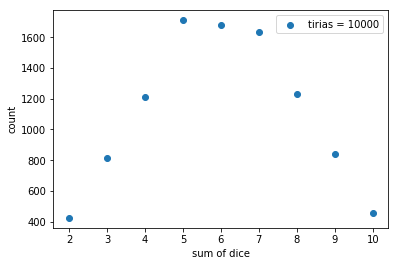

In [32]:
def situations(*pairs):
    """given the pairs of (sides,numbers) and return all the situation of one trial"""
    def calculate(pairs):
        if  len(pairs)==1:
            pair = pairs[0]
            sides,numbers = pair[0],pair[1]
            return list(map("".join,product(''.join([str(s) for s in range(1,sides+1)]),repeat=numbers)))
        elif len(pairs)>=2:
            return [a+b for a,b in product(calculate([pairs[0]]),calculate(pairs[1:]))]
    return calculate(pairs)
def predict_sum(total_situations):
    count = Counter(list(map(sum,[[int(x) for x in s] for s in total_situations])))
    pre_a  = sum([num*times/len(total_situations) for (num,times) in count.items()])
    pre_v  = sum([num**2*times/len(total_situations) for (num,times) in count.items() ])-pre_a**2
    pre_s  = pre_v**(1/2)
    return pre_a,pre_v,pre_s

total = (situations((4,1),(6,1)))
print("predict average  = {:^16.4f}".format(predict_sum(total)[0]))
print("predict variance = {:^16.4f}".format(predict_sum(total)[1]))
print("predict deviation = {:^15.4f}".format(predict_sum(total)[2]))
print(display((4,1),(6,1),trials=10000))

Roughly right, if we increase the trials, these two would be closer. <br>
Something interesting is that we find **the average,variance of the sum is the same as the sum of individual average and variance **

In [33]:
test1 = predict_sum(situations((4,1),(6,2)))
test2 = predict_sum(situations((6,2)))
individual_sum = list(map(lambda x,y: x+y,test1,test2))
print(test1)
print(test2)
print(individual_sum)

(9.5, 7.083333333333329, 2.6614532371118846)
(7.000000000000001, 5.833333333333314, 2.415229457698236)
[16.5, 12.916666666666643, 5.0766826948101205]


The average is not so surprising, for we know the average itself is a linear calculation. 
But what about variance? <br>
I spent some time searching and find some useful infomation.https://stats.stackexchange.com/questions/184998/the-linearity-of-variance . Roughly, if two random variables are indepdent, then the sum of variance would be the same as variance of the sum of these two random variable. Which specify the situation we encounter. Therefore, we can modify the formula derived in assignment1:

\begin{eqnarray*}
\bar{S}  &=& \Sigma_{S_i}\Sigma_{x=1}^{S_i}{xP_x}=\Sigma_{S_i}\frac{(S_i+1)}{2} \\
\sigma^2 &=& \Sigma_{S_i}\Sigma_{x=1}^{S_i}{x^2P_x}-\bar{S}^2 = \Sigma_{S_i}\frac{(S_i+1)(2S_i+1)}{6}-\Sigma_{S_i}\frac{(S_i+1)}{2} = \Sigma_{S_i}\frac{(S_i-1)(S_i+1)}{12} \\
\sigma   &=& \Sigma_{S_i}\sqrt{\frac{(S_i-1)(S_i+1)}{12}},S\geq 1
\end{eqnarray*}

In [34]:
def predict_quick(*pairs):
    """return the sum of average,variance and std with the formula above"""
    average = sum([numbers*(sides+1)/2 for (sides,numbers) in pairs])
    var     = sum([numbers*((sides)**2-1)/12 for (sides,numbers) in pairs]) 
    std     = var**(1/2)
    return average,var,std
print(predict_quick((4,1),(6,2)))
print(predict_quick((6,2)))

(9.5, 7.083333333333333, 2.661453237111885)
(7.0, 5.833333333333333, 2.41522945769824)


which reproduce the result above

### 2.Test the calculations that we have carried out for the mean, variance, and standard deviation of the sum of the numbers on the dice. In each case, obtain data for a couple of different run-lengths. Investigate the cases listed below. (a) Two dice, each with ten sides. (b) Ten dice, each with twenty sides.

sides    numbers
10             2
------------------------------------
sum        count
average:      11.2370    
variance:     16.0228    
deviation:    4.0029     


sides    numbers
10             2
------------------------------------
sum        count
average:      10.9858    
variance:     16.5786    
deviation:    4.0717     


sides    numbers
10             2
------------------------------------
sum        count
average:      10.9918    
variance:     16.4921    
deviation:    4.0610     




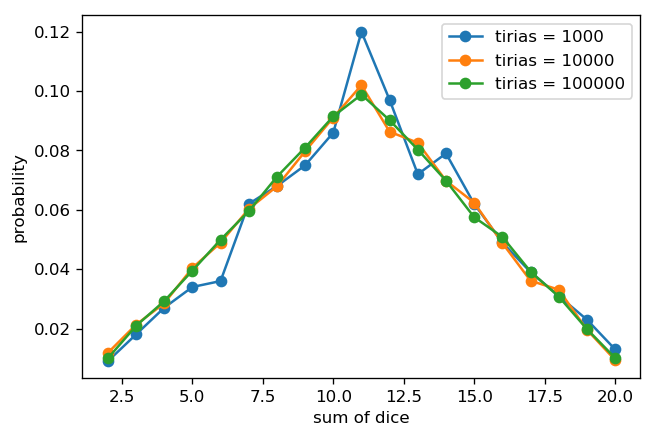

In [35]:
def display_modified(*pairs,trials=10000,show_detail=False):
    print("sides"+" "*4+"numbers")
    for pair in pairs:
        print("{:2}{:>14}".format(pair[0],pair[1]))
    result = sum_dices(*pairs,N=trials)
    order  = sorted(result.keys())
    print("------------------------------------")
    print("sum"+" "*8+"count")
    if show_detail:
        print("sum"+" "*8+"count")
        for o in order:
            print("{:3}{:>14}".format(o,result[o]))
    cal_a  = sum([num*times/trials for (num,times) in result.items()])
    cal_v  = sum([num**2*times/trials for (num,times) in result.items() ])-cal_a**2
    cal_s  = cal_v**(1/2)
    print("average:  {:^15.4f}".format(cal_a))
    print("variance: {:^15.4f}".format(cal_v))
    print("deviation:{:^15.4f}".format(cal_s))
    print('\n')
    X,Y = zip(*sorted(result.items()))
    Y   = [y/trials for y in Y]
    plt.plot(X,Y,"o-",label="tirias = {:d}".format(trials))
    plt.xlabel("sum of dice")
    plt.ylabel("probability")
    plt.legend(loc=1)
Trials = [10**i for i in range(3,6)]
plt.figure(dpi=120)
for trials in Trials:
    display_modified((10,2),trials=trials)


To compare different trials, I modified the display function. <br>
That is to say, I change y axis from count to probability. This way we can plot different trials in the same scale.<br>
Also,from the figure we can see if we increase the trials, the fluctuation would become much less and the result become more smooth. <br>



sides    numbers
20            10
------------------------------------
sum        count
average:     104.3210    
variance:    309.3480    
deviation:    17.5883    


sides    numbers
20            10
------------------------------------
sum        count
average:     104.9827    
variance:    331.4912    
deviation:    18.2069    


sides    numbers
20            10
------------------------------------
sum        count
average:     105.0168    
variance:    332.6616    
deviation:    18.2390    




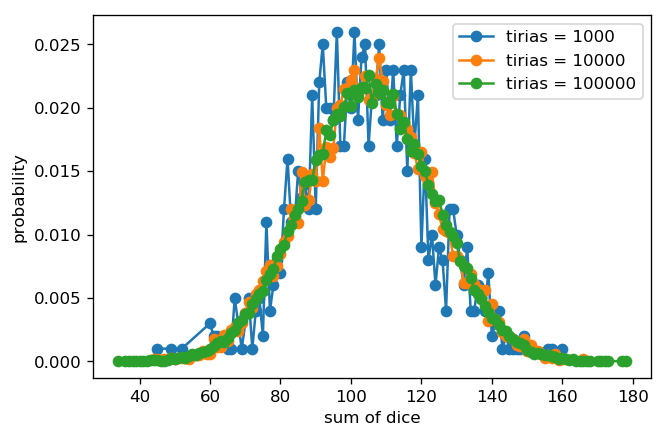

In [36]:
Trials = [10**i for i in range(3,6)]
plt.figure(dpi=120)
for trials in Trials:
    display_modified((20,10),trials=trials)

### 3.Use your program to investigate the width of the distribution for various numbers of two-sided dice. Does the width of the distribution increase or decrease with increasing numbers of dice? Do your results agree with the theory?

sides    numbers
 2             2
variance:     2.0059     
deviation:    1.4163     


sides    numbers
 2             6
variance:     6.2164     
deviation:    2.4933     


sides    numbers
 2            10
variance:     10.0109    
deviation:    3.1640     


sides    numbers
 2            14
variance:     14.2402    
deviation:    3.7736     


sides    numbers
 2            30
variance:     29.5496    
deviation:    5.4360     




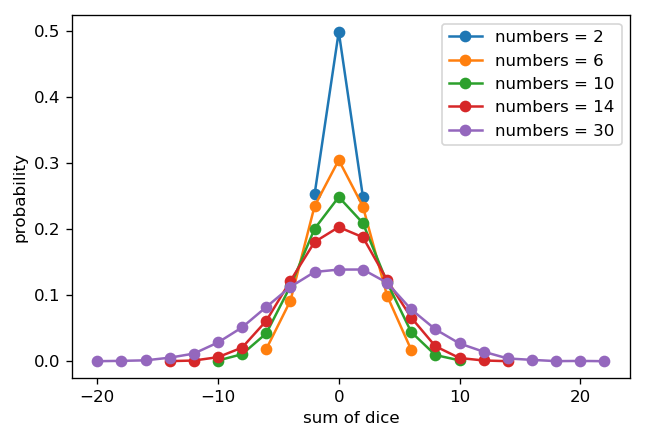

In [37]:
Numbers = [x for x in range(2,17,4)]
def dice(s):
    """ given how many sides, return one trial of throwing a dice of s sides"""
    return 2*random.randint(0,s-1)-1
def display_modified_2(*pairs,trials=10000):
    print("sides"+" "*4+"numbers")
    for pair in pairs:
        print("{:2}{:>14}".format(pair[0],pair[1]))
    result = sum_dices(*pairs,N=trials)
    cal_a  = sum([num*times/trials for (num,times) in result.items()])
    cal_v  = sum([num**2*times/trials for (num,times) in result.items() ])-cal_a**2
    cal_s  = cal_v**(1/2)
    print("variance: {:^15.4f}".format(cal_v))
    print("deviation:{:^15.4f}".format(cal_s))
    print('\n')
    X,Y = zip(*sorted(result.items()))
    Y   = [y/trials for y in Y]
    pair= pairs[0]
    plt.plot(X,Y,"o-",label="numbers = {:d}".format(pair[1]))
    plt.xlabel("sum of dice")
    plt.ylabel("probability")
    plt.legend(loc=1)
plt.figure(dpi=120)
for numbers in Numbers:
    display_modified_2((2,numbers))

display_modified_2((2,30))

I make a shift for sides of coin (if the dice has only two sides, I prefer call it a coin)  <br>
And let the sides from (1,2) -> (-1,1). This way we can have a common start for all the numbers (that is 0) <br>
From the figure, we find as we increase the numbers, the probability become smooth and the width of distribution become larger (we can see that from standard deviation directly) <be>
To analyse this, we can consider the value on 0, the probability of getting sum = 0 is equal to 


\begin{eqnarray*}
    P_{s=0} &=& \frac{N_{S_{-1}}!N_{S_{1}}!}{N_{tot}!} \\
            &=& \frac{\frac{N}{2}!\frac{N}{2}!}{N!} 
\end{eqnarray*}

which decrease with N increase, thus we know the probability for P(s=0) is lower for large N, however the probability is normalize to 1. That means for large N, the distribution would be wider such that the sum of probability can be the same as smaller N

# Problem 2: Computer simulations of mismatched dice

### 1.Write a computer program to compute the probability distribution for the sum of two dice when each die has an arbitrary number of sides. Run your program for dice of four and six sides.

sides    numbers
 4             1
 6             1
------------------------------------
average:      6.0067     
variance:     4.1731     
deviation:    2.0428     


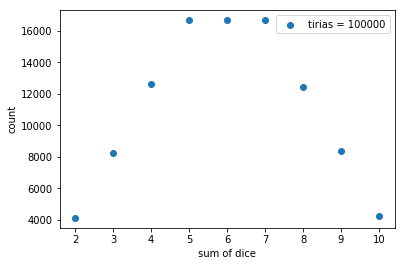

In [38]:
def dice(s):
    """ given how many sides, return one trial of throwing a dice of s sides"""
    return random.randint(1,s)
display((4,1),(6,1),trials=10**5)

### Modify the computer program you wrote for the previous problem to compute the probability distribution for the sum of three dice when each die has an arbitrary number of sides. Run your program once for all dice having six sides, and once for any combination you think interesting.

sides    numbers
 2             1
 3             1
10             1
------------------------------------
sum        count
  3          1734
  4          5104
  5          8236
  6          9736
  7         10019
  8         10053
  9         10005
 10         10054
 11          9950
 12          9967
 13          8453
 14          4955
 15          1734
average:      9.0068     
variance:     9.2065     
deviation:    3.0342     


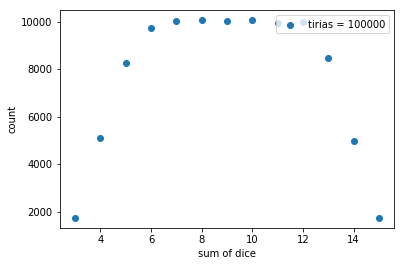

In [29]:
display((2,1),(3,1),(10,1),trials=100000,show_detail=True)